In [ ]:
import pandas as pd
import datetime

In [40]:
import pandas as pd
import datetime

df_crude_oil = pd.read_csv('cop.csv')

df_crude_oil['date'] = pd.to_datetime(df_crude_oil['date'])

df_crude_oil.set_index('date', inplace = True)

fecha_inicio = '1990-01-01'
fecha_fin = '2022-11-30'

df_crude_oil = df_crude_oil[fecha_inicio:fecha_fin]
print(df_crude_oil)

                           price  percentChange  change
date                                                   
1990-01-01 00:00:00+00:00  22.68          3.941    0.86
1990-02-01 00:00:00+00:00  21.54         -5.026   -1.14
1990-03-01 00:00:00+00:00  20.28         -5.850   -1.26
1990-04-01 00:00:00+00:00  18.54         -8.580   -1.74
1990-05-01 00:00:00+00:00  17.40         -6.149   -1.14
...                          ...            ...     ...
2022-07-01 00:00:00+00:00  96.75         -6.159   -6.35
2022-08-01 00:00:00+00:00  89.03         -7.979   -7.72
2022-09-01 00:00:00+00:00  78.72        -11.580  -10.31
2022-10-01 00:00:00+00:00  85.40          8.486    6.68
2022-11-01 00:00:00+00:00  80.66         -5.550   -4.74

[395 rows x 3 columns]


In [41]:
df_wid = pd.read_csv('wid.csv')

df_wid.drop(index = [0,1], inplace = True)

df_wid['Year'] = df_wid['Year'].astype(str)

df_wid = df_wid[('1990' <= df_wid['Year']) & (df_wid['Year'] <= '2024')]

df_wid['Month']=df_wid['Month'].replace('Unknown', 'January')
df_wid.drop(columns=['Date'], inplace=True)

df_wid['date'] = df_wid['Year'] + '-' + df_wid['Month'] + '-01'

df_wid['date'] = pd.to_datetime(df_wid['date'])

df_wid = df_wid.sort_values(by = 'date')

df_wid = df_wid.drop(columns=[ 'Impact', 'Affected Population',
                     'Important Person/Group Responsible', 'Month', 'Year', 'Sl. No'])
df_wid.set_index('date', inplace = True)

df_wid

,Name of Incident,Country,Type of Event,Place Name,Outcome
date,,,,,
1990-01-01,Kim DaeUnknownjung’s Sunshine Policy,South Korea,Diplomatic Policy,Korean Peninsula,Positive
1990-01-01,Tech Boom and DotUnknowncom Bubble,USA,Economic,"Silicon Valley, CA",Mixed
1990-01-01,New Zealand Bill of Rights Act,New Zealand,Legal Framework,New Zealand,Positive
1990-02-01,Nelson Mandela's Release from Prison,South Africa,Political,South Africa,Positive
1990-03-01,Independence from South Africa,Namibia,Independence,Namibia,Positive
...,...,...,...,...,...
2021-04-01,Prince Philip's Death,UK,Royal Event,Windsor,Negative
2021-08-01,Withdrawal from Afghanistan,USA,Military,Afghanistan,Negative
2021-12-01,Launch of James Webb Space Telescope,USA,Space Exploration,Space,Positive


# **Parte de visualización de datos**

## Grafico de precio vs tiempo

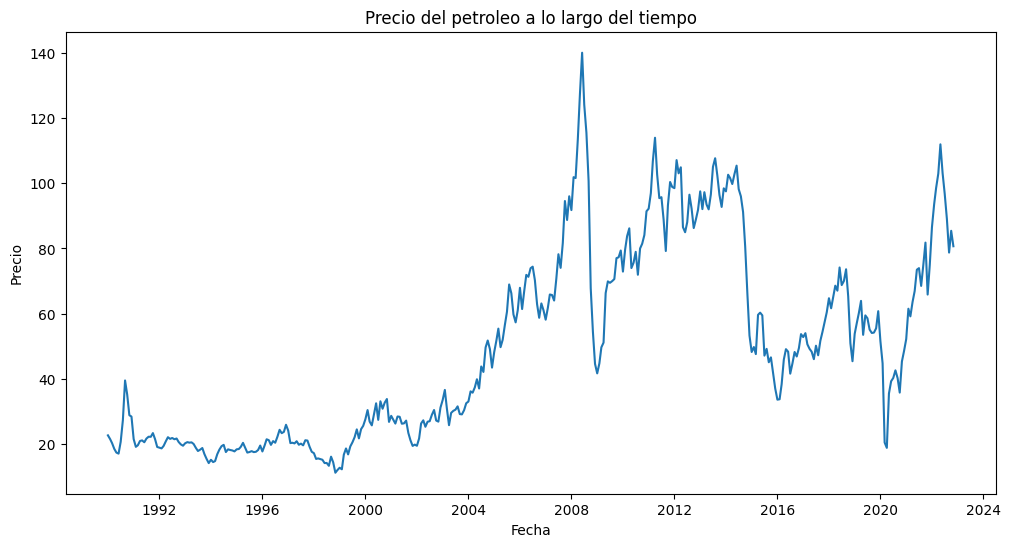

In [24]:
import matplotlib.pyplot as plt

main, ax_main = plt.subplots(figsize=(12, 6))
ax_main.plot(df_crude_oil.index, df_crude_oil['price'], label='Precio del petroleo')
ax_main.set_title('Precio del petroleo a lo largo del tiempo')
ax_main.set_xlabel('Fecha')
ax_main.set_ylabel('Precio')
plt.show()

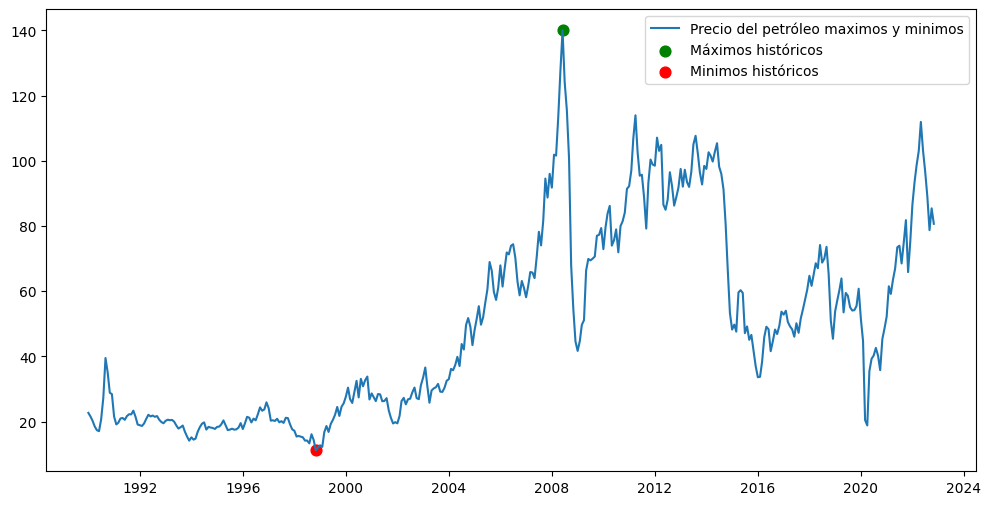

In [48]:
#encontramos minimos y maximos junto con su indices
max_precio = df_crude_oil['price'].max()
min_precio = df_crude_oil['price'].min()

fecha_max = df_crude_oil[df_crude_oil['price'] == max_precio].index
fecha_min = df_crude_oil[df_crude_oil['price'] == min_precio].index

fig_1, ax_1 = plt.subplots(figsize=(12, 6))

#graficamos
ax_1.plot(df_crude_oil.index, df_crude_oil['price'], label='Precio del petróleo maximos y minimos')
ax_1.scatter(fecha_max, [max_precio] * len(fecha_max), color='green', marker='o', s=60, label='Máximos históricos')
ax_1.scatter(fecha_min, [min_precio] * len(fecha_min), color='red', marker='o', s=60, label='Minimos históricos')
ax_1.legend()

ax_1.legend()
plt.show()


## Media del precio en un periodo de 50 dias

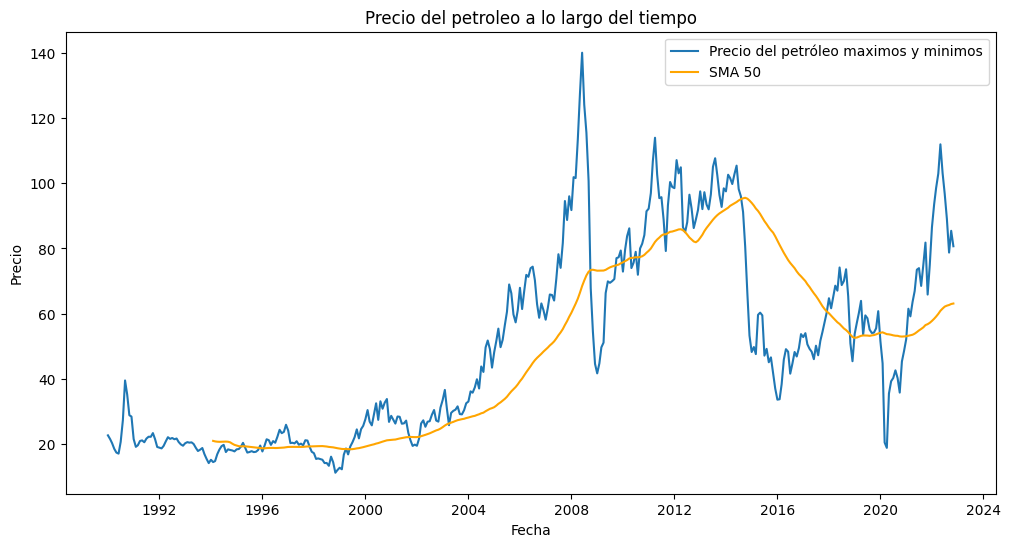

In [51]:
fig_1, ax_1 = plt.subplots(figsize=(12, 6))

#graficamos
ax_1.plot(df_crude_oil.index, df_crude_oil['price'], label='Precio del petróleo maximos y minimos')

df_crude_oil['SMA50'] = df_crude_oil['price'].rolling(window=50).mean()
ax_1.plot(df_crude_oil.index, df_crude_oil['SMA50'], label='SMA 50', color='orange')
ax_1.set_title('Precio del petroleo a lo largo del tiempo')
ax_1.set_xlabel('Fecha')
ax_1.set_ylabel('Precio')
ax_1.legend()
plt.show()


## Media del precio en un periodo de 200 dias

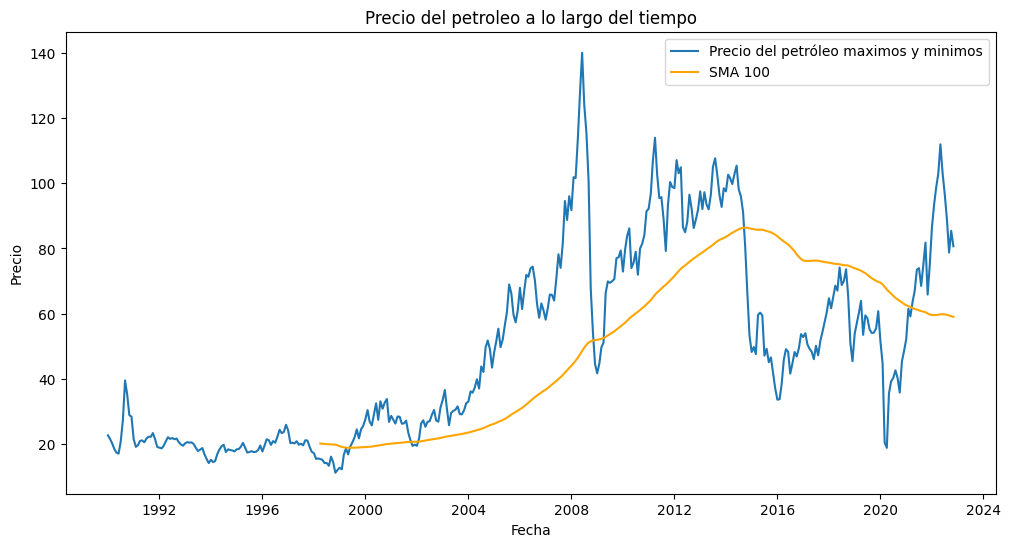

In [54]:
fig_1, ax_1 = plt.subplots(figsize=(12, 6))

#graficamos
ax_1.plot(df_crude_oil.index, df_crude_oil['price'], label='Precio del petróleo maximos y minimos')

df_crude_oil['SMA100'] = df_crude_oil['price'].rolling(window=100).mean()
ax_1.plot(df_crude_oil.index, df_crude_oil['SMA100'], label='SMA 100', color='orange')
ax_1.set_title('Precio del petroleo a lo largo del tiempo')
ax_1.set_xlabel('Fecha')
ax_1.set_ylabel('Precio')
ax_1.legend()
plt.show()

# ***Análisis de los datos***

In [ ]:
import pandas as pd
import datetime

df_crude_oil = pd.read_csv('cop.csv')

df_crude_oil['date'] = pd.to_datetime(df_crude_oil['date'])
print(df_crude_oil.columns)


Index(['date', 'price', 'percentChange', 'change'], dtype='object')


In [ ]:
import pandas as pd
df = pd.DataFrame([
    ['1990-01-01', "Kim DaeUnknownjung's Sunshine Policy", 'South Korea', 'Diplomatic Policy', 'Korean Peninsula', 'Positive'],
    ['1990-01-01', 'Tech Boom and DotUnknowncom Bubble', 'USA', 'Economic', 'Silicon Valley, CA', 'Mixed'],
    ['1990-01-01', 'New Zealand Bill of Rights Act', 'New Zealand', 'Legal Framework', 'New Zealand', 'Positive'],
    ['1990-02-01', "Nelson Mandela's Release from Prison", 'South Africa', 'Political', 'South Africa', 'Positive'],
    ['1990-03-01', 'Independence from South Africa', 'Namibia', 'Independence', 'Namibia', 'Positive'],
    ['2021-04-01', "Prince Philip's Death", 'UK', 'Royal Event', 'Windsor', 'Negative'],
    ['2021-08-01', 'Withdrawal from Afghanistan', 'USA', 'Military', 'Afghanistan', 'Negative'],
    ['2021-12-01', 'Launch of James Webb Space Telescope', 'USA', 'Space Exploration', 'Space', 'Positive'],
    ['2022-06-01', 'Supreme Court Overturns Roe v. Wade', 'USA', 'Judicial', 'Nationwide', 'Negative'],
    ['2022-10-01', 'Launch of 5G Services', 'India', 'Technology', 'India', 'Positive']
], columns=['date', 'Name of Incident', 'Country', 'Type of Event', 'Place Name', 'Outcome'])
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              10 non-null     object
 1   Name of Incident  10 non-null     object
 2   Country           10 non-null     object
 3   Type of Event     10 non-null     object
 4   Place Name        10 non-null     object
 5   Outcome           10 non-null     object
dtypes: object(6)
memory usage: 608.0+ bytes
None
              date                      Name of Incident Country  \
count           10                                    10      10   
unique           8                                    10       7   
top     1990-01-01  Kim DaeUnknownjung's Sunshine Policy     USA   
freq             3                                     1       4   

            Type of Event        Place Name   Outcome  
count                  10                10        10  
unique                 10   

In [ ]:
print(df['Type of Event'].value_counts())

Type of Event
Diplomatic Policy    1
Economic             1
Legal Framework      1
Political            1
Independence         1
Royal Event          1
Military             1
Space Exploration    1
Judicial             1
Technology           1
Name: count, dtype: int64


In [ ]:
print(df['Outcome'].value_counts())

Outcome
Positive    6
Negative    3
Mixed       1
Name: count, dtype: int64


In [ ]:
print(df.groupby('Country')['Outcome'].value_counts())
print(df.groupby('Type of Event')['Outcome'].value_counts())

Country       Outcome 
India         Positive    1
Namibia       Positive    1
New Zealand   Positive    1
South Africa  Positive    1
South Korea   Positive    1
UK            Negative    1
USA           Negative    2
              Mixed       1
              Positive    1
Name: count, dtype: int64
Type of Event      Outcome 
Diplomatic Policy  Positive    1
Economic           Mixed       1
Independence       Positive    1
Judicial           Negative    1
Legal Framework    Positive    1
Military           Negative    1
Political          Positive    1
Royal Event        Negative    1
Space Exploration  Positive    1
Technology         Positive    1
Name: count, dtype: int64


In [ ]:
df_crude_oil.set_index('date', inplace=True)
print(df_crude_oil.head())  # Verifica que el índice sea la fecha


                           price  percentChange  change
date                                                   
1983-03-01 00:00:00+00:00  29.27            NaN     NaN
1983-04-01 00:00:00+00:00  30.63          4.646    1.36
1983-05-01 00:00:00+00:00  30.25         -1.241   -0.38
1983-06-01 00:00:00+00:00  31.38          3.736    1.13
1983-07-01 00:00:00+00:00  32.00          1.976    0.62


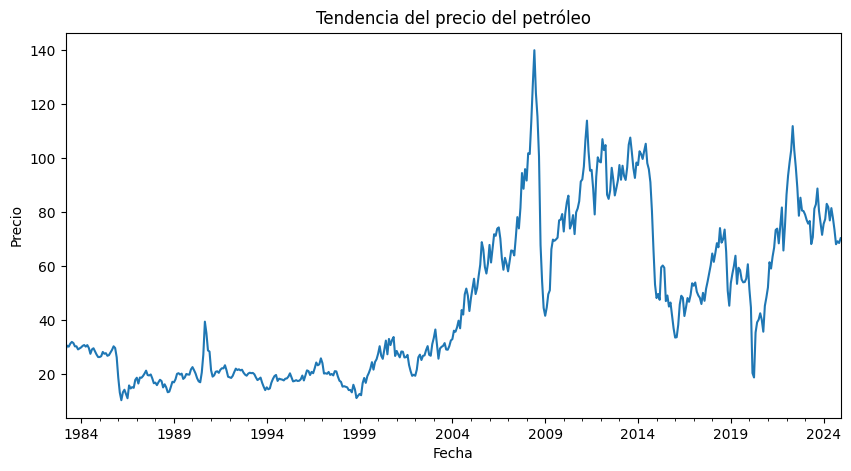

In [ ]:
import matplotlib.pyplot as plt

df_crude_oil['price'].plot(figsize=(10, 5), title='Tendencia del precio del petróleo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.show()


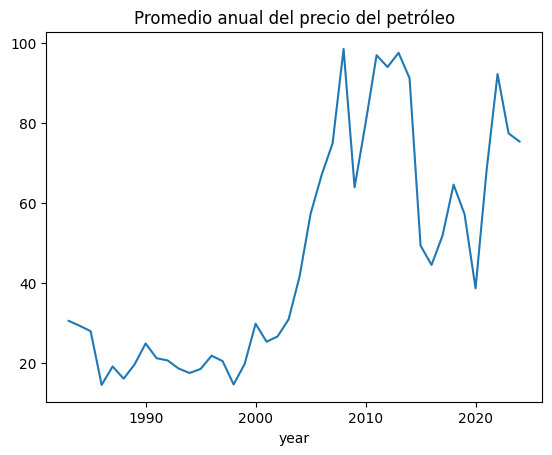

In [ ]:
df_crude_oil['year'] = df_crude_oil.index.year
yearly_summary = df_crude_oil.groupby('year').mean()
yearly_summary['price'].plot(title='Promedio anual del precio del petróleo')
plt.show()


En esta parte se hará enfásis en el análisis de pandemia.
Analizar cómo se comportó el precio del petróleo (price) durante el periodo de la pandemia (aproximadamente desde marzo de 2020 hasta finales de 2021).

In [ ]:
# Filtrar el rango de la pandemia
inicio_pandemia = '2020-03-01'
fin_pandemia = '2021-12-31'

df_pandemia = df_crude_oil[inicio_pandemia:fin_pandemia]
print(df_pandemia.head())


                           price  percentChange  change
date                                                   
2020-03-01 00:00:00+00:00  20.48        -54.245  -24.28
2020-04-01 00:00:00+00:00  18.84         -8.008   -1.64
2020-05-01 00:00:00+00:00  35.49         88.376   16.65
2020-06-01 00:00:00+00:00  39.27         10.651    3.78
2020-07-01 00:00:00+00:00  40.27          2.546    1.00


In [ ]:
# Estadísticas del periodo de la pandemia
pandemia_stats = df_pandemia['price'].describe()
print("Estadísticas del periodo de la pandemia:\n", pandemia_stats)

# Estadísticas generales para comparar
pre_pandemia_stats = df_crude_oil[:'2020-02-29']['price'].describe()
post_pandemia_stats = df_crude_oil['2022-01-01':]['price'].describe()

print("Estadísticas antes de la pandemia:\n", pre_pandemia_stats)
print("Estadísticas después de la pandemia:\n", post_pandemia_stats)


Estadísticas del periodo de la pandemia:
 count    22.000000
mean     53.802727
std      18.239299
min      18.840000
25%      40.232500
50%      55.680000
75%      68.107500
max      81.780000
Name: price, dtype: float64
Estadísticas antes de la pandemia:
 count    444.00000
mean      43.23063
std       28.45706
min       10.42000
25%       20.10250
50%       30.25500
75%       61.14000
max      140.00000
Name: price, dtype: float64
Estadísticas después de la pandemia:
 count     36.000000
mean      81.704606
std       10.610625
min       68.170000
25%       75.777500
50%       79.810000
75%       85.672500
max      111.910000
Name: price, dtype: float64


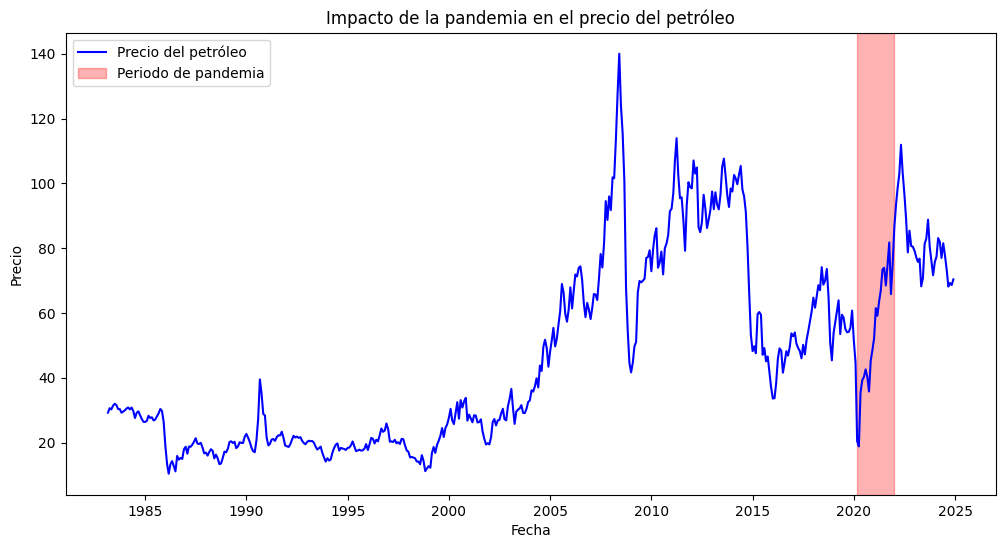

In [ ]:
import matplotlib.pyplot as plt

# Graficar precio del petróleo con énfasis en la pandemia
plt.figure(figsize=(12, 6))
plt.plot(df_crude_oil['price'], label='Precio del petróleo', color='blue')
plt.axvspan(pd.to_datetime(inicio_pandemia), pd.to_datetime(fin_pandemia), color='red', alpha=0.3, label='Periodo de pandemia')
plt.title('Impacto de la pandemia en el precio del petróleo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


Cambios porcentuales durante la pandemia:
 count    22.000000
mean      5.107182
std      24.566016
min     -54.245000
25%      -5.158000
50%       6.412500
75%       9.711500
max      88.376000
Name: percentChange, dtype: float64


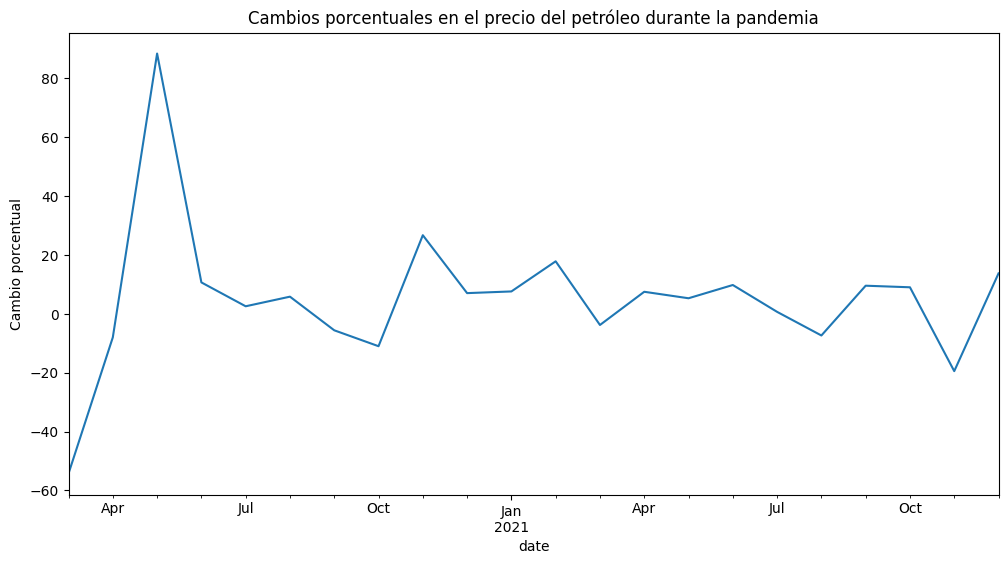

In [ ]:
# Calcular estadísticas de cambios porcentuales
pandemia_percent_cambio = df_pandemia['percentChange'].describe()
print("Cambios porcentuales durante la pandemia:\n", pandemia_percent_cambio)

# Graficar los cambios porcentuales
df_pandemia['percentChange'].plot(figsize=(12, 6), title='Cambios porcentuales en el precio del petróleo durante la pandemia')
plt.ylabel('Cambio porcentual')
plt.show()


En esta parte, se analizará cómo ha afectó la guerra entre Rusia y Ucrania.

La guerra de Rusia y Ucrania (que comenzó en febrero de 2022) tuvo un impacto significativo en los precios del petróleo debido a las tensiones geopolíticas y las sanciones económicas impuestas a Rusia, uno de los principales exportadores de petróleo a nivel mundial

In [ ]:
# Filtrar el rango desde el inicio de la guerra
inicio_guerra = '2022-02-24'
df_guerra = df_crude_oil[inicio_guerra:]
print(df_guerra.head())


             price  percentChange  change  year  rolling_mean
date                                                         
2022-03-01   98.52          5.369    5.02  2022     57.630427
2022-04-01  102.94          4.486    4.42  2022     59.255760
2022-05-01  111.91          8.714    8.97  2022     61.136520
2022-06-01  103.10         -7.872   -8.81  2022     62.548000
2022-07-01   96.75         -6.159   -6.35  2022     64.054333


In [ ]:
# Estadísticas del precio durante la guerra
guerra_stats = df_guerra['price'].describe()
print("Estadísticas del precio durante la guerra:\n", guerra_stats)

# Estadísticas generales para comparar
pre_guerra_stats = df_crude_oil[:'2022-02-23']['price'].describe()
print("Estadísticas del precio antes de la guerra:\n", pre_guerra_stats)


Estadísticas del precio durante la guerra:
 count     34.000000
mean      81.216935
std       10.688949
min       68.170000
25%       75.732500
50%       78.945000
75%       83.082625
max      111.910000
Name: price, dtype: float64
Estadísticas del precio antes de la guerra:
 count    468.000000
mean      43.927457
std       28.237273
min       10.420000
25%       20.267500
50%       30.730000
75%       63.242500
max      140.000000
Name: price, dtype: float64


In [ ]:
guerra_percent_change = df_guerra['percentChange'].describe()
std_dev = df_guerra['percentChange'].std()
skewness = df_guerra['percentChange'].skew()
kurtosis = df_guerra['percentChange'].kurtosis()

print("Cambios porcentuales durante la guerra:\n", guerra_percent_change)
print("Desviación estándar:", std_dev)
print("Asimetría:", skewness)
print("Curtosis:", kurtosis)

Cambios porcentuales durante la guerra:
 count    34.000000
mean     -0.630353
std       6.440839
min     -11.580000
25%      -5.738500
50%      -1.173000
75%       4.295000
max      14.891000
Name: percentChange, dtype: float64
Desviación estándar: 6.440839126972242
Asimetría: 0.26877260928129676
Curtosis: -0.5375807597904525


In [ ]:
trimestres = pd.PeriodIndex(df_guerra.index, freq='Q')
for trimestre in trimestres.unique():
    df_trimestre = df_guerra[trimestres == trimestre]
    trimestre_stats = df_trimestre['percentChange'].describe()
    print(f"Estadísticas para el trimestre {trimestre}:\n", trimestre_stats)

Estadísticas para el trimestre 2022Q1:
 count    1.000
mean     5.369
std        NaN
min      5.369
25%      5.369
50%      5.369
75%      5.369
max      5.369
Name: percentChange, dtype: float64
Estadísticas para el trimestre 2022Q2:
 count    3.000000
mean     1.776000
std      8.618696
min     -7.872000
25%     -1.693000
50%      4.486000
75%      6.600000
max      8.714000
Name: percentChange, dtype: float64
Estadísticas para el trimestre 2022Q3:
 count     3.000000
mean     -8.572667
std       2.758830
min     -11.580000
25%      -9.779500
50%      -7.979000
75%      -7.069000
max      -6.159000
Name: percentChange, dtype: float64
Estadísticas para el trimestre 2022Q4:
 count    3.000000
mean     0.892000
std      7.088558
min     -5.550000
25%     -2.905000
50%     -0.260000
75%      4.113000
max      8.486000
Name: percentChange, dtype: float64
Estadísticas para el trimestre 2023Q1:
 count    3.000000
mean    -1.964333
std      0.476480
min     -2.501000
25%     -2.151000
50%   

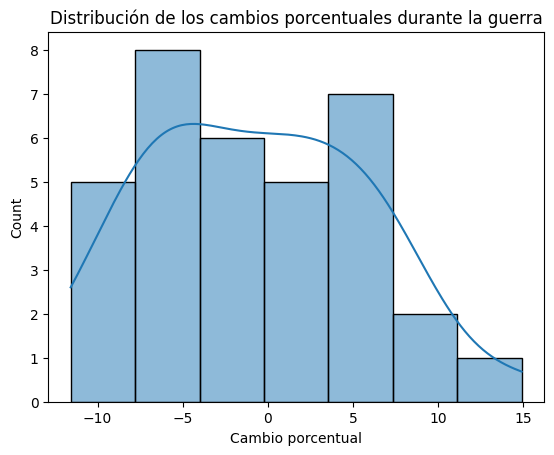

In [ ]:
import seaborn as sns

sns.histplot(df_guerra['percentChange'], kde=True)
plt.title('Distribución de los cambios porcentuales durante la guerra')
plt.xlabel('Cambio porcentual')
plt.show()

In [ ]:
# Comparar la volatilidad durante la guerra con periodos anteriores
pre_guerra_volatilidad = df_crude_oil['2021-01-01':'2021-12-31']['percentChange'].std()
guerra_volatilidad = df_guerra['percentChange'].std()

print(f"Volatilidad en 2021: {pre_guerra_volatilidad}")
print(f"Volatilidad durante la guerra: {guerra_volatilidad}")


Volatilidad en 2021: 10.237576457330952
Volatilidad durante la guerra: 6.440839126972242


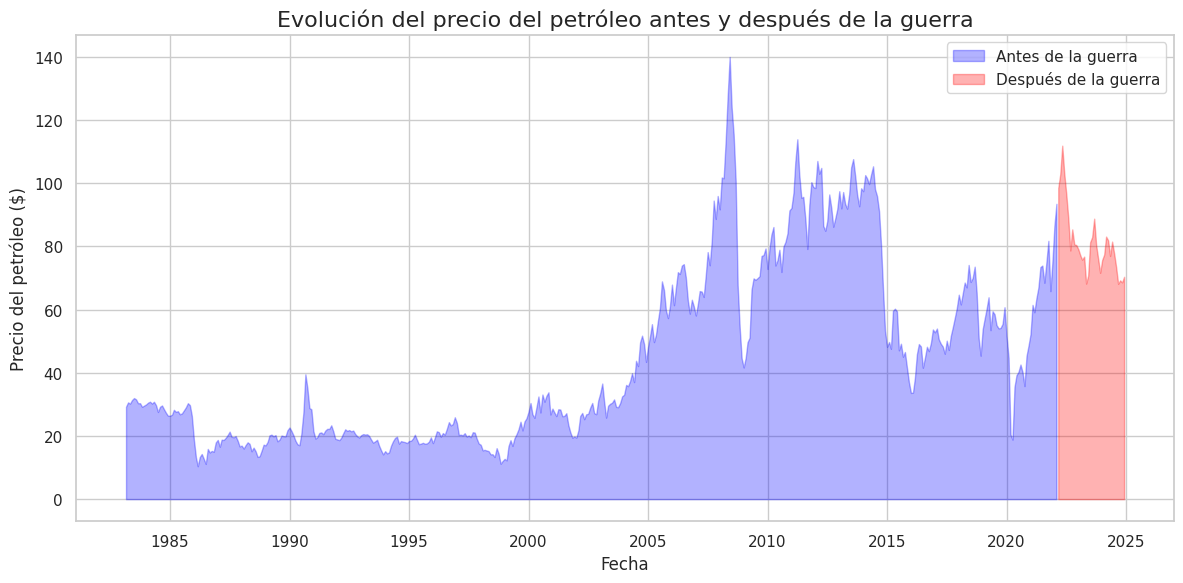

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.fill_between(df_crude_oil.index, df_crude_oil['price'], where=(df_crude_oil.index < pd.to_datetime(inicio_guerra)), color='blue', alpha=0.3, label='Antes de la guerra')
plt.fill_between(df_crude_oil.index, df_crude_oil['price'], where=(df_crude_oil.index >= pd.to_datetime(inicio_guerra)), color='red', alpha=0.3, label='Después de la guerra')

plt.title('Evolución del precio del petróleo antes y después de la guerra', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio del petróleo ($)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


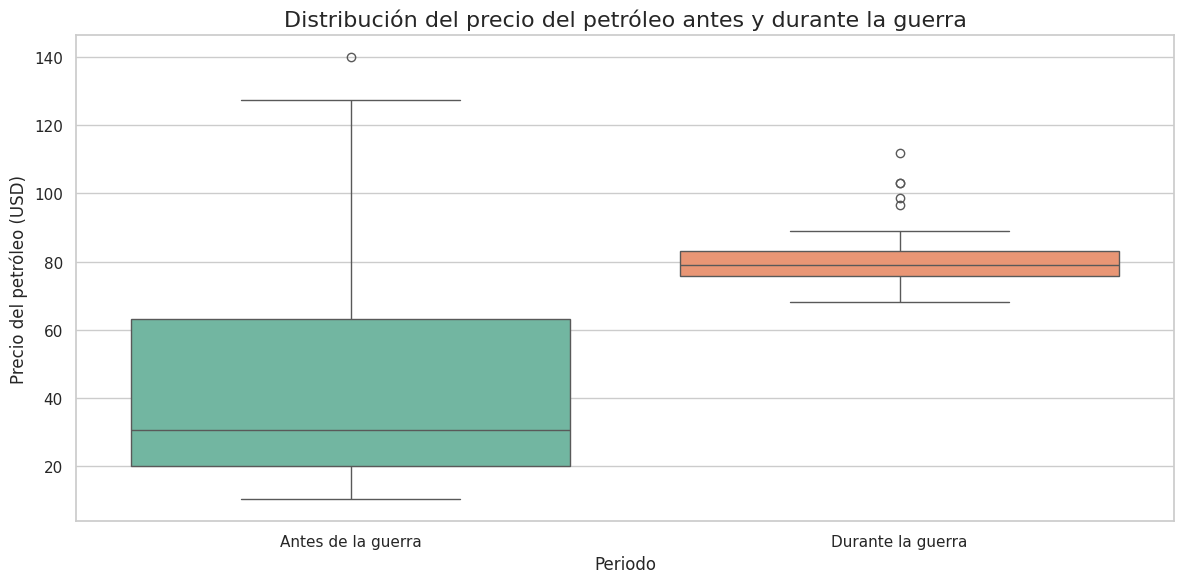

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos filtrados para antes de la guerra (hasta el 23 de febrero de 2022)
pre_guerra = df_crude_oil[:'2022-02-23']['price']

# Datos filtrados para durante la guerra (desde el 24 de febrero de 2022)
df_guerra = df_crude_oil['2022-02-24':]['price']

# Crear un DataFrame para juntar los dos períodos
data = pd.DataFrame({
    'Precio': pd.concat([pre_guerra, df_guerra]),
    'Periodo': ['Antes de la guerra'] * len(pre_guerra) + ['Durante la guerra'] * len(df_guerra)
})

# Crear un gráfico de cajas para comparar las distribuciones
plt.figure(figsize=(12, 6))
sns.boxplot(x='Periodo', y='Precio', data=data, hue='Periodo', palette='Set2', legend=False)

# Añadir detalles al gráfico
plt.title('Distribución del precio del petróleo antes y durante la guerra', fontsize=16)
plt.ylabel('Precio del petróleo (USD)', fontsize=12)
plt.xlabel('Periodo', fontsize=12)
plt.tight_layout()

plt.show()


En esta parte se analizará la Crisis FInanciera de 2008.

Está Crisis tuvo sus incios en el segundo semestre de 2008.

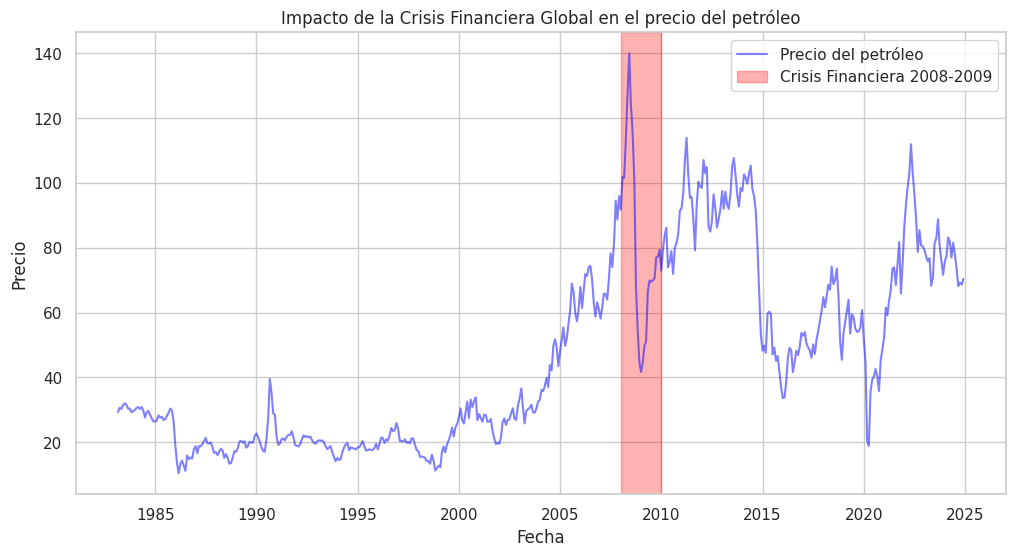

In [ ]:
# Filtrar datos para la crisis financiera
crisis_inicio = '2008-01-01'
crisis_fin = '2009-12-31'
df_crisis = df_crude_oil[crisis_inicio:crisis_fin]

# Graficar los precios durante la crisis financiera
plt.figure(figsize=(12, 6))
plt.plot(df_crude_oil['price'], label='Precio del petróleo', color='blue', alpha=0.5)
plt.axvspan(pd.to_datetime(crisis_inicio), pd.to_datetime(crisis_fin), color='red', alpha=0.3, label='Crisis Financiera 2008-2009')
plt.title('Impacto de la Crisis Financiera Global en el precio del petróleo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

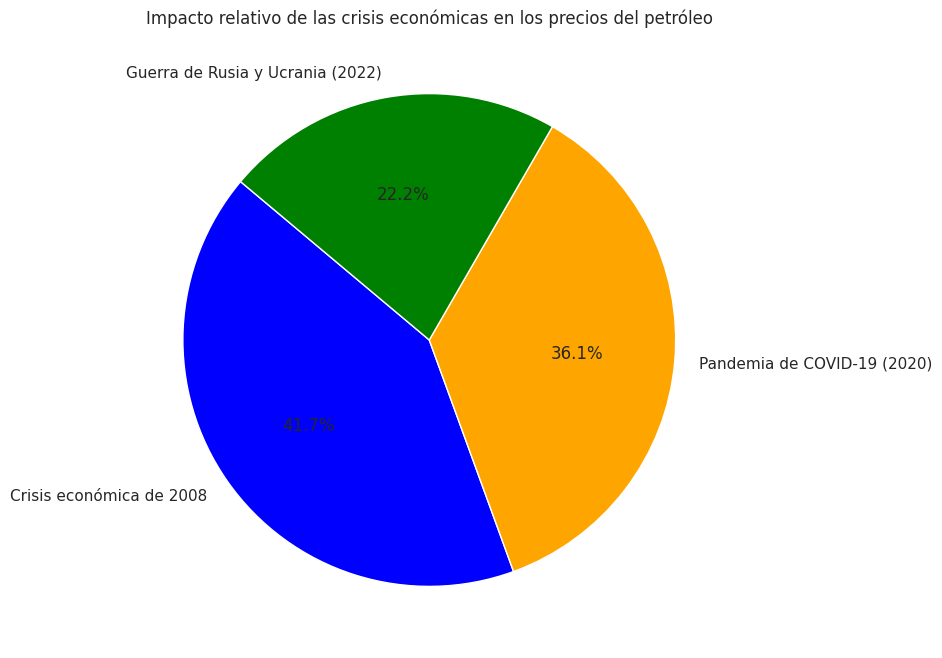

In [ ]:
import matplotlib.pyplot as plt

impactos = {
    "Crisis económica de 2008": 75,  # Descenso máximo del precio en la crisis de 2008
    "Pandemia de COVID-19 (2020)": 65,  # Descenso máximo durante la pandemia
    "Guerra de Rusia y Ucrania (2022)": 40  # Impacto en los primeros meses de la guerra
}


etiquetas = list(impactos.keys())
valores = list(impactos.values())

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green'])

plt.title("Impacto relativo de las crisis económicas en los precios del petróleo")

plt.show()


# ***LIMPIEZA DE DATOS***

In [ ]:
# Verificar si hay valores faltantes en cada columna
print(df_crude_oil.isnull().sum())

# Eliminar filas con valores nulos
df_crude_oil_cleaned = df_crude_oil.dropna()

df_crude_oil['price'] = df_crude_oil['price'].fillna(df_crude_oil['price'].mean())
print(df_crude_oil_cleaned.isnull().sum())


date             0
price            0
percentChange    1
change           1
dtype: int64
date             0
price            0
percentChange    0
change           0
dtype: int64


In [ ]:
# Eliminar filas duplicadas
df_crude_oil_cleaned = df_crude_oil.drop_duplicates()

# Verificar si aún hay duplicados
print(df_crude_oil_cleaned.duplicated().sum())


0


In [ ]:
import pandas as pd
import datetime

df_crude_oil = pd.read_csv('cop.csv')
# Convertir la columna 'date' a tipo datetime si no está correctamente formateada
df_crude_oil['date'] = pd.to_datetime(df_crude_oil['date'], errors='coerce')

# Verificar el tipo de datos de cada columna
print(df_crude_oil.dtypes)


date             datetime64[ns, UTC]
price                        float64
percentChange                float64
change                       float64
dtype: object


In [ ]:
# Filtrar los precios que son menores que 0
df_crude_oil_cleaned = df_crude_oil[df_crude_oil['price'] >= 0]
print(df_crude_oil_cleaned['price'].describe())


count    502.000000
mean      46.453039
std       28.960878
min       10.420000
25%       20.450000
50%       33.785000
75%       69.402500
max      140.000000
Name: price, dtype: float64


In [ ]:
# Calcular el IQR (Interquartile Range) para detectar outliers
Q1 = df_crude_oil['price'].quantile(0.25)
Q3 = df_crude_oil['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores atípicos (fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
df_crude_oil_cleaned = df_crude_oil[(df_crude_oil['price'] >= (Q1 - 1.5 * IQR)) & (df_crude_oil['price'] <= (Q3 + 1.5 * IQR))]

# Verificar los datos después de filtrar outliers
print(df_crude_oil_cleaned['price'].describe())


count    502.000000
mean      46.453039
std       28.960878
min       10.420000
25%       20.450000
50%       33.785000
75%       69.402500
max      140.000000
Name: price, dtype: float64


In [ ]:
# Calcular la variación porcentual diaria
df_crude_oil['percentChange'] = df_crude_oil['price'].pct_change() * 100

# Verificar los primeros valores
print(df_crude_oil.head())


                       date  price  percentChange  change
0 1983-03-01 00:00:00+00:00  29.27            NaN     NaN
1 1983-04-01 00:00:00+00:00  30.63       4.646396    1.36
2 1983-05-01 00:00:00+00:00  30.25      -1.240614   -0.38
3 1983-06-01 00:00:00+00:00  31.38       3.735537    1.13
4 1983-07-01 00:00:00+00:00  32.00       1.975781    0.62
